In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

In [4]:
df.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [5]:
df['ordermonth'] = df['order_date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').
                        strftime('%Y-%m'))

# buat kolom GMV
df['gmv'] = df['item_price']*df['quantity']

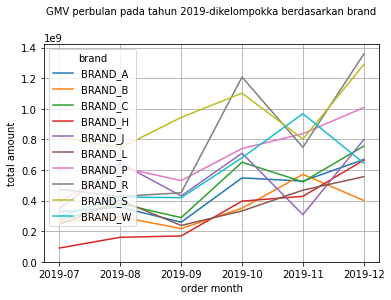

In [9]:
# buat multiline chart

df.groupby(['ordermonth','brand'])['gmv'].sum().unstack().plot()
plt.title('GMV perbulan pada tahun 2019-dikelompokka berdasarkan brand',loc='center',fontsize=10,pad=30)
plt.ylabel('total amount')
plt.xlabel('order month')
plt.ylim(ymin=0)
plt.grid(color='darkgrey')
plt.show()

In [ ]:
df.groupby()